In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import scipy.optimize as sco
from scipy import stats
%matplotlib inline
path= ("C:/Users/yacine/Desktop/thesis/pred/lstm")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [2]:
all_files = glob.glob(os.path.join(path, "df_*.csv"))

In [3]:
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    all_df.append(df)


In [4]:
merged_df = pd.concat(all_df, sort=False, axis=1)
merged_df

,Unnamed: 0,AAPL_close_lstm_pred,Unnamed: 0,AMGN_close_lstm_pred,Unnamed: 0,AXP_close_lstm_pred,Unnamed: 0,BA_close_lstm_pred,Unnamed: 0,CAT_close_lstm_pred,...,Unnamed: 0,UNH_close_lstm_pred,Unnamed: 0,V_close_lstm_pred,Unnamed: 0,VZ_close_lstm_pred,Unnamed: 0,WBA_close_lstm_pred,Unnamed: 0,WMT_close_lstm_pred
0,0,30.005250,0,111.966470,0,72.727310,0,114.09401,0,64.361290,...,0,101.530136,0.0,71.765300,0,25.420937,0,55.333763,0,41.300587
1,1,30.238289,1,112.024560,1,72.350670,1,114.17812,1,62.397198,...,1,101.686050,1.0,70.610670,1,24.998207,1,55.348880,1,41.325455
2,2,30.370853,2,112.655660,2,72.938880,2,114.41168,2,65.435905,...,2,102.218420,2.0,69.904940,2,25.858036,2,55.578953,2,41.012314
3,3,30.429588,3,113.456190,3,73.114174,3,114.31014,3,64.026700,...,3,102.570660,3.0,69.878235,3,25.479410,3,55.685520,3,40.566803
4,4,30.331640,4,114.153534,4,73.782730,4,114.49795,4,65.351685,...,4,102.692245,4.0,69.607280,4,25.836039,4,55.987602,4,41.311720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,891,34.728096,891,119.908000,891,87.183080,891,124.25589,891,118.829560,...,891,118.781906,NaN,NaN,891,31.495900,891,47.951298,891,49.437350
892,892,34.664726,892,119.913150,892,86.957160,892,124.28680,892,118.699844,...,892,118.859090,NaN,NaN,892,31.773780,892,48.184040,892,49.349090
893,893,34.633705,893,119.995770,893,86.554760,893,124.29982,893,118.721850,...,893,118.901080,NaN,NaN,893,31.426035,893,47.925488,893,49.256280
894,894,34.562570,894,119.979360,894,86.933900,894,124.31437,894,118.757150,...,894,119.026375,NaN,NaN,894,31.834660,894,47.787945,894,49.356293


In [5]:
stock_pred=merged_df.drop(['Unnamed: 0'], axis = 1) 
stock_pred

,AAPL_close_lstm_pred,AMGN_close_lstm_pred,AXP_close_lstm_pred,BA_close_lstm_pred,CAT_close_lstm_pred,CRM_close_lstm_pred,CSCO_close_lstm_pred,CVX_close_lstm_pred,DIS_close_lstm_pred,GS_close_lstm_pred,...,MRK_close_lstm_pred,MSFT_close_lstm_pred,NKE_close_lstm_pred,PG_close_lstm_pred,TRV_close_lstm_pred,UNH_close_lstm_pred,V_close_lstm_pred,VZ_close_lstm_pred,WBA_close_lstm_pred,WMT_close_lstm_pred
0,30.005250,111.966470,72.727310,114.09401,64.361290,66.986565,19.518686,73.902200,78.896120,137.15398,...,35.759415,26.583273,42.180542,55.925940,83.418785,101.530136,71.765300,25.420937,55.333763,41.300587
1,30.238289,112.024560,72.350670,114.17812,62.397198,66.929190,19.427732,74.102690,78.954660,135.05423,...,34.638107,26.581501,42.262714,55.236027,83.376060,101.686050,70.610670,24.998207,55.348880,41.325455
2,30.370853,112.655660,72.938880,114.41168,65.435905,66.793430,19.330290,77.294980,79.065674,137.03030,...,36.092785,27.120884,42.607960,56.059470,83.800460,102.218420,69.904940,25.858036,55.578953,41.012314
3,30.429588,113.456190,73.114174,114.31014,64.026700,66.604485,19.486874,75.854460,79.090950,134.25183,...,36.693035,27.104736,42.733177,55.613625,83.818060,102.570660,69.878235,25.479410,55.685520,40.566803
4,30.331640,114.153534,73.782730,114.49795,65.351685,66.329765,19.703836,78.264114,79.166500,137.37001,...,37.319504,27.539057,43.497227,57.080006,84.122025,102.692245,69.607280,25.836039,55.987602,41.311720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,34.728096,119.908000,87.183080,124.25589,118.829560,NaN,41.942787,96.339150,80.312770,155.37033,...,48.870300,52.721474,49.985880,58.175396,88.974075,118.781906,NaN,31.495900,47.951298,49.437350
892,34.664726,119.913150,86.957160,124.28680,118.699844,NaN,42.090430,96.798810,80.449450,154.08470,...,49.567833,52.738266,50.100190,57.762100,88.775130,118.859090,NaN,31.773780,48.184040,49.349090
893,34.633705,119.995770,86.554760,124.29982,118.721850,NaN,42.101180,96.706440,80.535095,151.56876,...,50.111694,52.743088,50.091293,58.011320,88.700230,118.901080,NaN,31.426035,47.925488,49.256280
894,34.562570,119.979360,86.933900,124.31437,118.757150,NaN,42.837850,98.152720,80.571884,152.48305,...,50.686367,52.751335,50.112415,58.198875,88.486590,119.026375,NaN,31.834660,47.787945,49.356293


In [6]:
stocks=stock_pred.drop(['AXP_close_lstm_pred','AMGN_close_lstm_pred','IBM_close_lstm_pred','BA_close_lstm_pred','CAT_close_lstm_pred','CRM_close_lstm_pred','GS_close_lstm_pred','CVX_close_lstm_pred','DIS_close_lstm_pred','HD_close_lstm_pred','MRK_close_lstm_pred','CSCO_close_lstm_pred','INTC_close_lstm_pred','NKE_close_lstm_pred','TRV_close_lstm_pred','UNH_close_lstm_pred','V_close_lstm_pred','KO_close_lstm_pred','WMT_close_lstm_pred'], axis = 1) 
stocks 

,AAPL_close_lstm_pred,HON_close_lstm_pred,JNJ_close_lstm_pred,JPM_close_lstm_pred,MCD_close_lstm_pred,MMM_close_lstm_pred,MSFT_close_lstm_pred,PG_close_lstm_pred,VZ_close_lstm_pred,WBA_close_lstm_pred
0,30.005250,78.631454,66.355920,45.701996,85.198250,114.842250,26.583273,55.925940,25.420937,55.333763
1,30.238289,78.014404,64.795910,45.335304,84.552315,113.764460,26.581501,55.236027,24.998207,55.348880
2,30.370853,79.149506,66.616510,45.569977,84.951690,114.787370,27.120884,56.059470,25.858036,55.578953
3,30.429588,78.429610,66.372680,45.010906,84.196550,114.416046,27.104736,55.613625,25.479410,55.685520
4,30.331640,79.302720,67.526924,45.676900,84.947390,114.919495,27.539057,57.080006,25.836039,55.987602
...,...,...,...,...,...,...,...,...,...,...
891,34.728096,92.192375,82.791210,60.381725,107.830890,129.144800,52.721474,58.175396,31.495900,47.951298
892,34.664726,92.155556,82.315330,60.357330,107.929280,128.869840,52.738266,57.762100,31.773780,48.184040
893,34.633705,92.416570,82.253640,60.058930,108.001250,128.940080,52.743088,58.011320,31.426035,47.925488
894,34.562570,92.419960,82.718430,60.197620,107.996470,129.443250,52.751335,58.198875,31.834660,47.787945


In [7]:
stock = ['AAPL','HON','JNJ','JPM','MCD','MMM','MSFT','PG','VZ','WBA']

In [8]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [9]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

In [10]:
results_frame

,ret,stdev,sharpe,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
0,0.066176,0.094042,0.512282,0.178897,0.143170,0.163994,0.178295,0.052329,0.026390,0.039006,0.156301,0.055217,0.006402
1,0.050067,0.097766,0.327993,0.143178,0.126077,0.121492,0.001105,0.085115,0.022823,0.030919,0.147978,0.147482,0.173830
2,0.080129,0.101368,0.612910,0.044287,0.030327,0.114754,0.056461,0.169310,0.061153,0.142610,0.164233,0.160867,0.055998
3,0.087060,0.099702,0.692663,0.132081,0.103259,0.038192,0.156661,0.088286,0.097199,0.153315,0.059457,0.151393,0.020156
4,0.086931,0.110626,0.623105,0.029534,0.018901,0.078616,0.068813,0.046815,0.187825,0.184392,0.167783,0.193183,0.024138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.061463,0.080163,0.542179,0.061776,0.071440,0.115225,0.133357,0.185601,0.137045,0.084511,0.079814,0.002877,0.128355
49996,0.081794,0.093658,0.681140,0.126564,0.082989,0.193404,0.038126,0.033808,0.129605,0.182633,0.130167,0.058813,0.023890
49997,0.069828,0.084593,0.612670,0.212790,0.072919,0.093720,0.180021,0.232260,0.054216,0.055934,0.040497,0.023895,0.033746
49998,0.064101,0.096031,0.480062,0.145899,0.105584,0.079034,0.072179,0.069512,0.114787,0.071446,0.109112,0.141001,0.091446


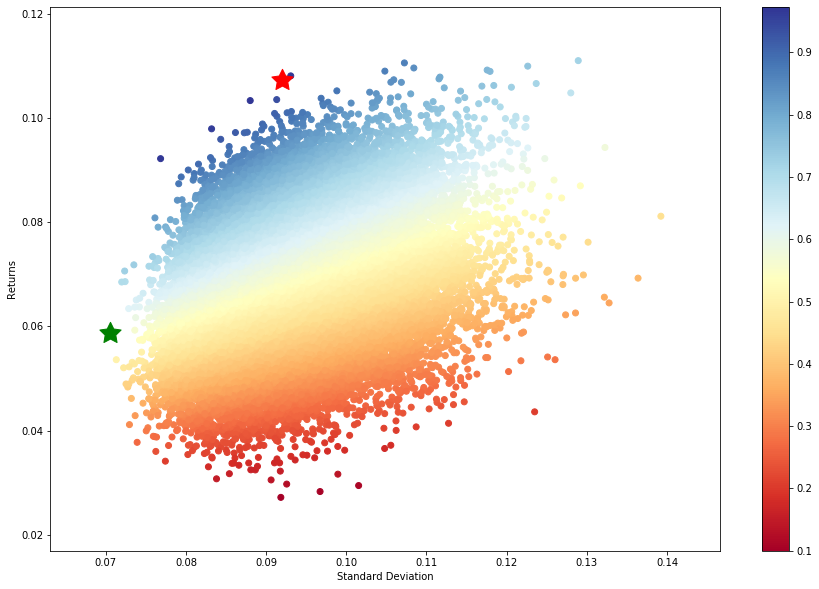

In [11]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [12]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
12986,0.107435,0.09195,0.972648,0.041886,0.250671,0.036918,0.079164,0.071009,0.041077,0.339856,0.023949,0.07372,0.041751


In [13]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
10950,0.058746,0.070475,0.578172,0.126112,0.295107,0.092867,0.021862,0.261322,0.15233,0.014132,0.018098,0.016338,0.001832


In [14]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [15]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

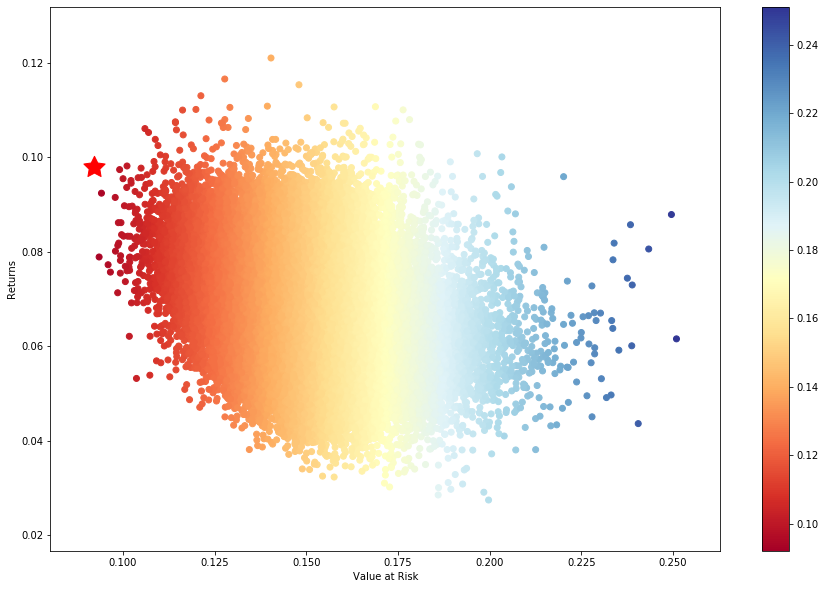

In [16]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [17]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
20918,0.097908,0.08167,0.092086,0.112231,0.124524,0.084716,0.060605,0.309637,0.020107,0.249383,0.010341,0.01269,0.015767


In [18]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [19]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018


results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

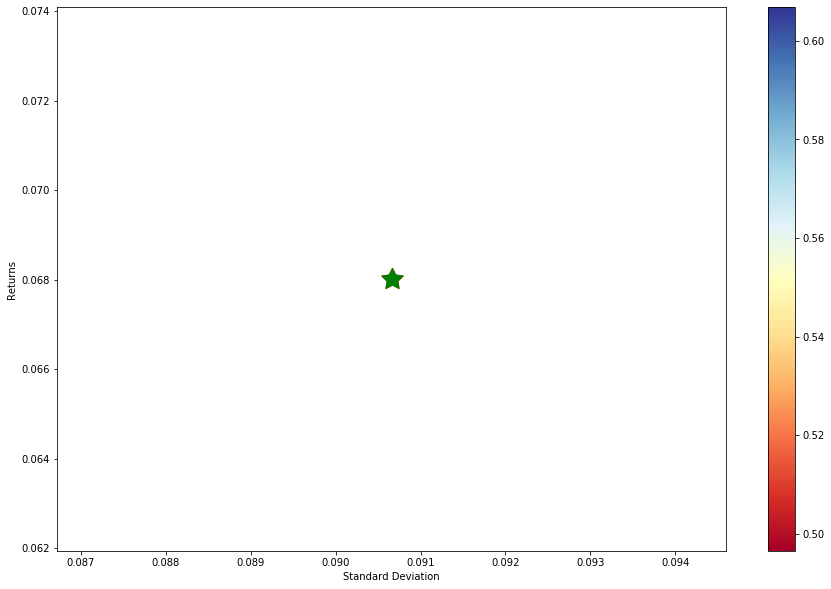

In [20]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [21]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
0,0.068014,0.090658,0.55168,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [22]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [23]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

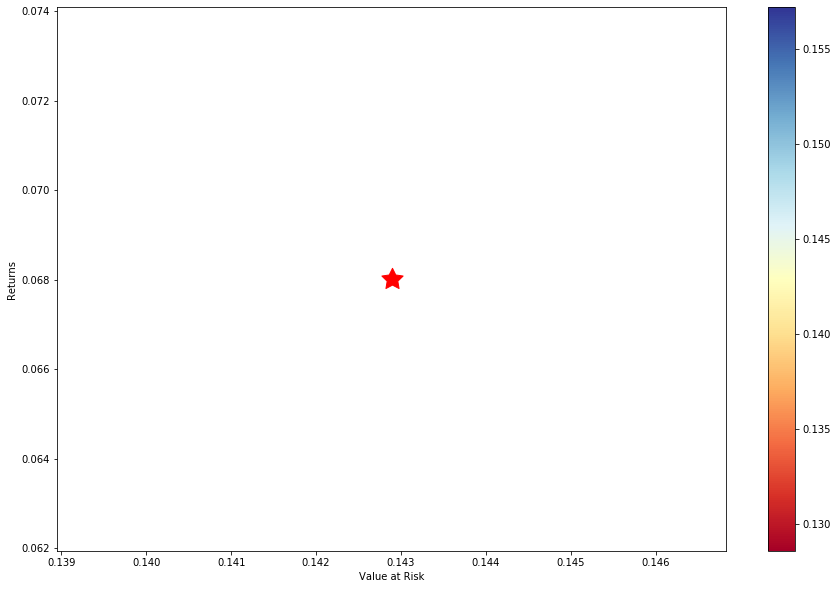

In [24]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [25]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,HON,JNJ,JPM,MCD,MMM,MSFT,PG,VZ,WBA
0,0.068014,0.090658,0.142888,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
